In [0]:
# Persiapkan data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

In [0]:
# Ekstraksi file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
# Direktori data
base_dir = '/tmp/rockpaperscissors'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)
print(f'Total rock images: {len(rock_files)}')
print(f'Total paper images: {len(paper_files)}')
print(f'Total scissors images: {len(scissors_files)}')

Total rock images: 726
Total paper images: 712
Total scissors images: 750


/tmp/rockpaperscissors/rock/tZFZV6hmUogDBeMl.png


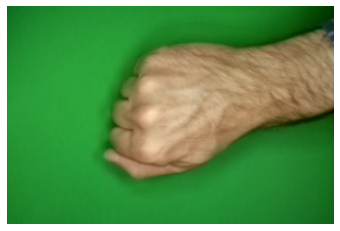

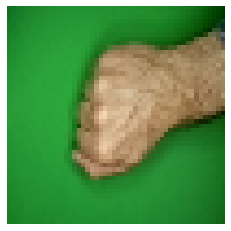

/tmp/rockpaperscissors/paper/TcybcTuKdMPA4xpT.png


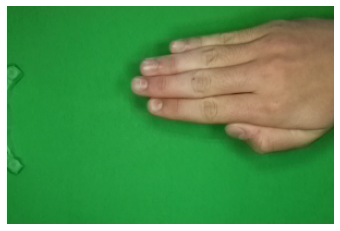

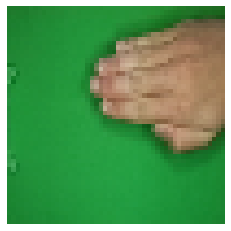

/tmp/rockpaperscissors/scissors/vMAludIRGF14FuGn.png


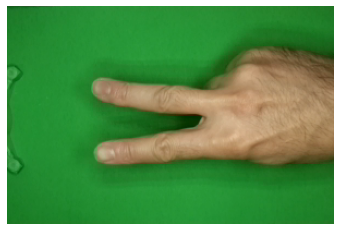

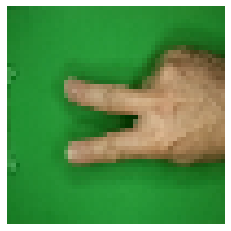

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

# Path gambar 
rock_img = [os.path.join(rock_dir, rock_files[0])]
paper_img = [os.path.join(paper_dir, paper_files[0])]
scissors_img = [os.path.join(scissors_dir, scissors_files[0])]

# Tampilkan gambar
for n, path in enumerate(rock_img+paper_img+scissors_img):
    img = mpimg.imread(path)
    print(path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()
    #Konversi
    new_img = cv2.resize(img, (50,50))
    plt.imshow(new_img)
    plt.axis('Off')
    plt.show()

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
data_dir = '/tmp/rockpaperscissors/rps-cv-images/'
image_augs_gen = ImageDataGenerator(
                  rescale=1./255,        
                  horizontal_flip=True,
                  vertical_flip = True,
                  height_shift_range=.2,
                  rotation_range=40,
                  fill_mode='nearest',
                  validation_split = 0.2)  

train_generator = image_augs_gen.flow_from_directory(
                  data_dir,
                  target_size = (50,50),
                  batch_size=16,
                  class_mode = 'categorical',
                  shuffle=True,)

validation_generator = image_augs_gen.flow_from_directory(
                  data_dir,
                  target_size=(50,50),
                  batch_size=16,
                  class_mode='categorical',
                  subset = 'validation',
                  shuffle=False)

Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [12]:
from keras import layers
from keras import models

# Membuat arsitektur CNN
model = tf.keras.models.Sequential([
    # Empat kali convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Using TensorFlow backend.


In [14]:
# Tentukan optimizer dan loss function
model.compile(optimizer=Adamax(), 
              loss = 'kullback_leibler_divergence', 
              metrics=['accuracy'])

#Latih model
model.fit(train_generator,
          steps_per_epoch=50,
          epochs=25,
          validation_data = validation_generator,
          validation_steps = 5,
          verbose=1)

Epoch 1/25
50/50 [==============================] - 4s 70ms/step - loss: 1.1015 - accuracy: 0.3375 - val_loss: 1.1271 - val_accuracy: 0.0000e+00
Epoch 2/25
50/50 [==============================] - 3s 65ms/step - loss: 1.0660 - accuracy: 0.4462 - val_loss: 0.9913 - val_accuracy: 0.4125
Epoch 3/25
50/50 [==============================] - 3s 68ms/step - loss: 0.8625 - accuracy: 0.6244 - val_loss: 0.6394 - val_accuracy: 0.8250
Epoch 4/25
50/50 [==============================] - 3s 65ms/step - loss: 0.5473 - accuracy: 0.7987 - val_loss: 0.0598 - val_accuracy: 1.0000
Epoch 5/25
50/50 [==============================] - 3s 64ms/step - loss: 0.4389 - accuracy: 0.8263 - val_loss: 0.3137 - val_accuracy: 0.8696
Epoch 6/25
50/50 [==============================] - 3s 64ms/step - loss: 0.4420 - accuracy: 0.8430 - val_loss: 0.4879 - val_accuracy: 0.8250
Epoch 7/25
50/50 [==============================] - 3s 65ms/step - loss: 0.3393 - accuracy: 0.8712 - val_loss: 0.2081 - val_accuracy: 0.9500
Epoch 8/2

KeyboardInterrupt: ignored

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Upload file
uploaded = files.upload()
class_name = ['PAPER', 'ROCK', 'SCISSORS']

for fn in uploaded.keys():
 
    # Prediksi gambar
    path = fn
    img = image.load_img(path, target_size=(50, 50))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    print(classes)
    print(class_name[np.argmax(classes)])